In [130]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt

In [131]:
class normal_2D(object):
    def __init__(self, Ipeak, sigmax, sigmay):
        #print(Ipeak, sigmax, sigmay)
        self.__Ipeak = Ipeak
        self.__sigmax = sigmax
        self.__sigmay = sigmay
    def value(self, x, y):
        factor = self.__Ipeak/(2.*np.pi*self.__sigmax * self.__sigmay)
        factorx = np.exp(-x**2/(2.*self.__sigmax**2))
        factory = np.exp(-y**2/(2.*self.__sigmay**2))
        return factor*factorx*factory
        
    def integral(self, xmin, xmax):
        integration = sci.dblquad(self.value, xmin, xmax,lambda x: 0,lambda x:np.sqrt(xmax**2-x**2),
                                  epsrel = 1e-12, epsabs = 0)
        return integration
    def distance(self, x, y):
        factor = self.__Ipeak/(2.*np.pi*self.__sigmax * self.__sigmay)
        factorx = np.exp(-x**2/(2.*self.__sigmax**2))
        factory = np.exp(-y**2/(2.*self.__sigmay**2))
        r = np.sqrt(x**2+y**2)
        return factor*factorx*factory*r**2
    def integral_distance(self, xmin, xmax):
        integration = sci.dblquad(self.distance, xmin, xmax,lambda x: 0,lambda x:np.sqrt(xmax**2-x**2),
                                  epsrel = 1e-12, epsabs = 0)
        return integration
    
    def __call__(self, x, y):
        return self.value(x, y)
    
class simple_normal():
    def __init__(self,Ipeak,sigma):
        self.__Ipeak = Ipeak
        self.__sigma = sigma
    def value(self,x):
        factor  = self.__Ipeak/np.sqrt(2*np.pi*self.__sigma**2)
        factor2 = np.exp(-x**2/(2*self.__sigma**2))
        return factor*factor2
    def integral(self, a, b):
        integration = sci.quad(self.value, a, b, epsrel = 1e-12, epsabs = 0)
        return integration
    def integral_distance(self, a, b):
        integration = sci.quad(self.value, a, b, epsrel = 1e-12, epsabs = 0)
        return integration
    def __call__(self, x):
        return self.value(x)

In [132]:
sigmax = 0.1
sigmay = 0.1
I_peak = 1
model = normal_2D(I_peak,sigmax,sigmay)
#for i in np.arange(5):
#    value = model.value(i,0)
#    print(i,value)
"FWHM"
cont = model.integral(0,sigmax*np.sqrt(2*np.log(2)))
print("FWHM   :{:.3f}%".format(cont[0]*4*100))
"Sigma"
cont = model.integral(0,sigmax)
print("1sigma :{:.3f}%".format(cont[0]*4*100))
cont = model.integral(0,1000)
print("ALL    :{:.3f}%".format(cont[0]*4*100))


norm = model.integral_distance(0,1000)
cont = model.integral_distance(0,sigmax)
print("1sigma :{:.3f}%".format(cont[0]*100*4))
cont = model.integral_distance(0,sigmax*np.sqrt(2*np.log(2)))
print("FWHM   :{:.3f}%".format(cont[0]*100*4))
cont = model.integral_distance(0,1000)
print("ALL    :{:.3f}%".format(cont[0]*100*4))

FWHM   :50.000%
1sigma :39.347%
ALL    :100.000%
1sigma :0.180%
FWHM   :0.307%
ALL    :2.000%


In [133]:
mean = 0
sdv  = 0.1
x = np.random.normal(mean, sdv,100000)
print(np.mean(np.abs(x**2)))

0.009973714728017134


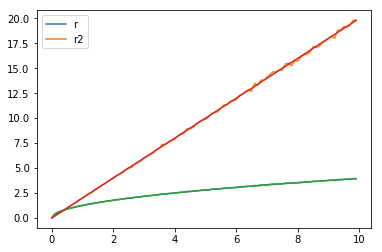

In [134]:
r_list=[]
r2_list=[]
for i in range(100):
    mean = [0, 0]
    cov = [[0.1*i, 0], [0, 0.1*i]]
    x, y = np.random.multivariate_normal(mean, cov, 10000).T
    #plt.plot(x, y, 'x')
    #plt.axis('equal')
    #plt.show()
    r  = np.sqrt(x**2+y**2)
    r2 = x**2+y**2
    r_list.append(np.mean(r))
    r2_list.append(np.mean(r2))
x = np.arange(0,10,0.1)
plt.plot(x,r_list,label="r")
plt.plot(x,r2_list,label="r2")
#plt.plot(x,x**(1/3))
plt.plot(x,x**(0.5)*1.25)
plt.plot(x,2*x)
plt.legend()
plt.show()

In [129]:
# 1D normal distribution
# 1sigma内の積分は68%
# |r|の期待値はsigmaの0.8倍になる
# r^2の期待値はsigma^2になる

# 2D normal distribution
# 1sigma内の積分は39%
# FWHM内の積分は50%
# |r|の期待値はsigmaの1.25倍になる
# r^2の期待値はsigma^2の二倍になる